# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Recopie le dataset du drive vers le disque dur de la session colab
# !cp -r '/content/drive/MyDrive/Colab Notebooks/TP1/' /content/ 
!cp -r '/content/drive/MyDrive/Cours Apprentissage Automatique et Réseaux de Neurones/TP1/' /content/ 

In [ ]:
# données
#X = np.genfromtxt('/content/data.csv', delimiter=',', dtype=int)
X = np.genfromtxt('/content/TP1/data.csv', delimiter=',', dtype=int)
X.shape

(5000, 400)

In [ ]:
# étiquettes
#Y = np.genfromtxt('/content/labels.csv', delimiter=',', dtype=int)
Y = np.genfromtxt('/content/TP1/labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

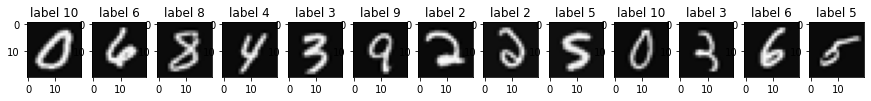

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0]) #pich a random line from the dataset 
    a = X[c,:].reshape((20, 20)) #shape of one number in the image 
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion :

In [ ]:
def Matrice_de_confusion(Y, P):  
  k = len(np.unique(Y))
  mat = np.zeros(shape=(k,k), dtype= np.uint) #init
  for i in range(len(Y)):
    mat[Y[i]-1][P[i]-1] += 1 # -1 car la matrice (les indices) commance  de 0 -> 9
  return mat

In [ ]:
def Matrice_de_confusion_RNC(Y, P):  
  k = len(np.unique(Y))
  mat = np.zeros(shape=(k,k), dtype= np.uint) #init
  for i in range(len(Y)):
    mat[Y[i]][P[i]] += 1 
  return mat

- Rappel :

In [ ]:
#Rappel pour une seule classe
def Rappel_class(Num_class,y,P): # y une sous liste de Y  tq |y| =|P| (y == les vrais classes du test set)
    cpt = 0
    VP_FN = np.count_nonzero(y == Num_class) #VP plus FN: les VP sont les elements de la classe 'num_class' qui ont été predit juste et les FN sont les elements de la classe 'num_class' qui ont été predit fauxet donc FN+VP est le nombre d'lements de la classe 'Num_class'
    for i in range(len(P)):
      if P[i]==y[i]==Num_class:
        cpt+=1
    if VP_FN!=0 :      #pour eviter le probleme de la division par 0
        res =cpt/VP_FN
    else :
        res = 0
    return res

In [ ]:
#Rappel
def Rappel(y,P):
  sum=0
  k = len(np.unique(y))
  for i in range(1,k+1):
    sum = sum + Rappel_class(i,y,P)

  return (1/len(np.unique(y))) * sum
#Rappel RNC car num classe commance de 0
def Rappel_RNC(y,P):
  sum=0
  k = len(np.unique(y))
  for i in range(0,k):
    sum = sum + Rappel_class(i,y,P)

  return (1/len(np.unique(y))) * sum

- Précision

In [ ]:
#Precision pour une seule classe
def Precision_class(Num_class,y,P):
    cpt = 0
    VP_FP = np.count_nonzero(P == Num_class) #VP plus FP : les VP sont les elements de la classe 'num_class' qui ont été predit juste et les FP ne sont pas des elements de la classe 'num_class' mais ont été predit comme tels et donc pour avoir FP+VP il suffit de compter le nombre d'elements prédit comme étant de la classe 'Num_class'
    for i in range(len(P)):
      if P[i]==y[i]==Num_class:
        cpt+=1
    if VP_FP!=0 :
        res =cpt/VP_FP  #pour eviter le probleme de la division par 0
    else :
        res = 0
    return res

In [ ]:
# Précision
def Precision(y,P):
  sum=0
  k = len(np.unique(y))
  for i in range(1,k+1):
    sum = sum + Precision_class(i,y,P)

  return (1/len(np.unique(y))) * sum
#Précision RNC car num classe commance de 0
def Precision_RNC(y,P):
  sum=0
  k = len(np.unique(y))
  for i in range(0,k):
    sum = sum + Precision_class(i,y,P)

  return (1/len(np.unique(y))) * sum

- Taux de FP

In [ ]:
#Taux de FP pour une seule classe
def Taux_FP_class(Num_class,y,P):
    cpt = 0
    VP_FP = np.count_nonzero(P == Num_class) #VP plus FP
    for i in range(len(P)):
      if P[i]==Num_class and y[i] != Num_class : # FP
        cpt+=1
    if VP_FP!=0 :
        res =cpt/VP_FP
    else :
        res = 0
    return res

In [ ]:
# Taux de FP
def Taux_FP(y,P):
  sum=0
  for i in range(1,len(np.unique(y))+1):

    sum = sum + Taux_FP_class(i,y,P)

  return (1/len(np.unique(y))) * sum

# Taux de FP RNC car num classe commance de 0
def Taux_FP_RNC(y,P):
  sum=0
  for i in range(0,len(np.unique(y))):
    sum = sum + Taux_FP_class(i,y,P)

  return (1/len(np.unique(y))) * sum

- Spécificité

In [ ]:
#Spécificité 
def Specificite(y,P):
   return 1 - Taux_FP(y,P)
#Spécificité RNC
def Specificite_RNC(y,P):
   return 1 - Taux_FP_RN_RNC(y,P)




- Courbe ROC RNC

In [ ]:
#prendre la proba de la classe en question (Num_class)
def Prob_bin(P,Num_class):
  temp=[]
  P_mod=[]
  for i in range(len(P)):
    temp = P[i]
    P_mod.append(temp[Num_class])
  return P_mod

In [ ]:
# transformer la dimension de Ytt_rnc en un vecteur d'une dimension avec la realité train
def Mod_Y(Y):
  temp=[]
  Y_mod=[]
  for i in range(len(Y)):
    temp = Y[i]
    Y_mod.append(np.where(temp == 1)[0][0])
  return Y_mod

In [ ]:
# courbe roc pour une seule classe
def Courbe_ROC(Num_class,Y,P, nb_partitions):
    roc = np.array([])
    P_res = Prob_bin(P,Num_class)
    roc = np.array([])
    for i in range(nb_partitions):
      threshold_vector = np.greater_equal(P_res, i / nb_partitions).astype(int)
      # On a modifié le vecteur selon notre methode de calcul de Rappel(TPR) et Taux de FP(FPR)
      #au lieu d'avoir des 0 et des 1 on remplace les 1 par le numéro de la classe et les 0 par -1 pour ne pas avoir confusion avec les 'labels'
      threshold_vector = np.where(threshold_vector == 0, -1 , threshold_vector)
      threshold_vector = np.where(threshold_vector == 1, Num_class , threshold_vector)
      TPR = Rappel_class(Num_class,Y,threshold_vector)
      FPR =Taux_FP_class(Num_class,Y,threshold_vector)
      roc = np.append(roc, [FPR, TPR])
    return roc.reshape(-1, 2)

In [ ]:
# courbe roc pour toute les classes 
def Courbe_ROC_all_classes(Y,P, nb_partitions):
    Y_res = np.array( Mod_Y(Y))
    for i in range(10):
        ROC = Courbe_ROC(i,Y_res,P, nb_partitions)
        # Afficher les graphes
        plt.subplot(211)
        plt.title('classe = '+ str(i))
       # plt.scatter(,color='#0F9D58',s=20)
        plt.plot(ROC[:,0],ROC[:,1])
        plt.show()



- Courbe ROC SVM AD RN

In [ ]:
#prendre la proba de la classe en question (Num_class)
def Prob_bin_2(P,Num_class):
  temp=[]
  P_mod=[]
  for i in range(len(P)):    #nos labels ne sont pas de 0-9 mais la structure de lignes des prédictions est de 0-9
    temp = P[i]
    P_mod.append(temp[Num_class-1])
  return P_mod

In [ ]:
# courbe roc pour une seule classe
def Courbe_ROC_2(Num_class,Y,P, nb_partitions):
    roc = np.array([])
    P_res = Prob_bin_2(P,Num_class)
    roc = np.array([])
    for i in range(nb_partitions):
      threshold_vector = np.greater_equal(P_res, i / nb_partitions).astype(int)
      # On a modifié le vecteur selon notre methode de calcule de Rappel(TPR) et Taux de FP(FPR)
      threshold_vector = np.where(threshold_vector == 0, -1 , threshold_vector)
      threshold_vector = np.where(threshold_vector == 1, Num_class , threshold_vector)
      TPR = Rappel_class(Num_class,Y,threshold_vector)
      FPR =Taux_FP_class(Num_class,Y,threshold_vector)
      roc = np.append(roc, [FPR, TPR])
    return roc.reshape(-1, 2)

In [ ]:
# courbe roc pour toute les classes  SVM AD RN
def Courbe_ROC_all_classes_2(Y,P, nb_partitions):
    Y_res = Y
    for i in range(1,11):
        ROC = Courbe_ROC_2(i,Y_res,P, nb_partitions)
        # Afficher les graphes
        plt.subplot(211)
        plt.title('classe = '+ str(i))
       # plt.scatter(,color='#0F9D58',s=20)
        plt.plot(ROC[:,0],ROC[:,1])
        plt.show()

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [ ]:
tRatio=2/3
ttRatio=1/3
# implementer la division
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, test_size = ttRatio, random_state= None) 
#random state is the object that controls randomization (None default value)
print("Données de train X :" + str(Xt.shape))
print("Données de test X :" + str(Xtt.shape))
print("Etiquettes de données de train Y :"+ str(Yt.shape))
print("Etiquettes de données de test Y :"+ str(Ytt.shape))

Données de train X :(3333, 400)
Données de test X :(1667, 400)
Etiquettes de données de train Y :(3333,)
Etiquettes de données de test Y :(1667,)


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [ ]:
from scipy.spatial.distance import euclidean
from math import sqrt
from tqdm import tqdm

In [ ]:
def euclidean_distance(a, b):
	return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))

In [ ]:
from queue import PriorityQueue
def KNN(x,X, Y, k):
    # Il faudra retourner l'etiquette de x, en le comparant à toutes les données de Xt, Yt
    distances = PriorityQueue() # On utilise une Priority Queue pour éviter de trier  les voisins du plus proche au moins proche
    knn = np.zeros(11) # 11 pour palié au problème de (X = 0) == (Y = 10)
    for i in range(len(X)):
      d = euclidean_distance(x, X[i]) # Calcule de la distence euclidienne
      distances.put((d, i)) # Sauvegarde de la distance ainsi que de l'index du l'image 
 
    for i in range(k):
      x, y = distances.get()
      knn[Y[y]] += 1 # On prend les K plus proche voisins 

    return np.where(knn == max(knn))[0][0] # On retourne le label qui reviens le plus souvent

The Prediction result is 9 while the real result is 8


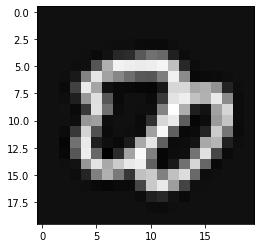

In [ ]:
i = 300
k = 50
prediction_Knn = KNN(Xtt[i], Xt, Yt, k)
plt.imshow(Xtt[i].reshape(20, 20), cmap='gray')
print('The Prediction result is '+str(prediction_Knn)+' while the real result is '+str(Ytt[i]))

In [ ]:
# On utilise la fonction KNN qui calcule la distence entre une image et le training set afin de créér une fonction KPP général 
                # de plusieurs images teste avec plusieurs images train
def KPP(x,X, Y, k):
  preds = []
  for i in tqdm(x):
    preds.append(KNN(i, X, Y, k))
  
  return np.array(preds)

In [ ]:
predictions = KPP(Xtt, Xt, Yt, k)

100%|██████████| 1667/1667 [17:49<00:00,  1.56it/s]


Marice de confusion

In [ ]:
# from scratch
Matrice_de_confusion(Ytt, predictions)

array([[156,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [ 12, 134,   2,   2,   3,   0,   8,   5,   0,   2],
       [  4,   1, 147,   0,   1,   2,   3,   1,   7,   1],
       [  6,   0,   0, 150,   0,   3,   0,   0,  15,   0],
       [  0,   1,   9,   1, 153,   5,   0,   0,   3,   3],
       [  2,   0,   0,   2,   1, 164,   0,   0,   0,   1],
       [ 15,   0,   0,   2,   0,   0, 140,   0,   4,   0],
       [  7,   0,   6,   1,   4,   2,   1, 135,   6,   2],
       [  2,   0,   2,   1,   0,   0,   1,   0, 159,   0],
       [  0,   0,   0,   0,   1,   3,   0,   2,   0, 160]], dtype=uint64)

In [ ]:
#sklearn
confusion_matrix(Ytt, predictions)

array([[156,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [ 12, 134,   2,   2,   3,   0,   8,   5,   0,   2],
       [  4,   1, 147,   0,   1,   2,   3,   1,   7,   1],
       [  6,   0,   0, 150,   0,   3,   0,   0,  15,   0],
       [  0,   1,   9,   1, 153,   5,   0,   0,   3,   3],
       [  2,   0,   0,   2,   1, 164,   0,   0,   0,   1],
       [ 15,   0,   0,   2,   0,   0, 140,   0,   4,   0],
       [  7,   0,   6,   1,   4,   2,   1, 135,   6,   2],
       [  2,   0,   2,   1,   0,   0,   1,   0, 159,   0],
       [  0,   0,   0,   0,   1,   3,   0,   2,   0, 160]])

Rappel

In [ ]:
#from scratch
print("Rappel (from scratch) :"+str(format(Rappel(Ytt,predictions) , ".4f")))

Rappel (from scratch) :0.8993


In [ ]:
#sklearn
print("Rappel (sklearn) :"+ str(format(recall_score(Ytt, predictions, average='macro'), ".4f")))

Rappel (sklearn) :0.8993


Précision

In [ ]:
#from scratch
print("Précision (from scratch) :"+str(format(Precision(Ytt,predictions) , ".4f")))

Précision (from scratch) :0.9053


In [ ]:
#sklearn
print("Précision (sklearn) :"+ str(format(precision_score(Ytt, predictions, average='macro'), ".4f")))

Précision (sklearn) :0.9053


Taux de FP

In [ ]:
print("Taux de FP :"+ str(format(Taux_FP(Ytt,predictions), ".4f")))

Taux de FP :0.0947


Spécificité

In [ ]:
print("Spécifité :"+ str(format(Specificite(Ytt,predictions), ".4f")))

Spécifité :0.9053


# Méthode 1: MVS
Machine à Vecteurs de Support

In [ ]:
#Créer le modèle
model= svm.SVC(kernel='linear',probability=True) 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)
print(y_pred)

[ 4  3 10 ...  6  8  7]


10


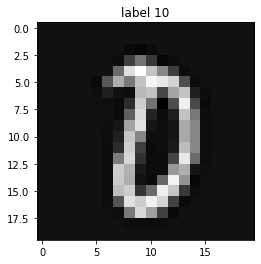

In [ ]:
# tester une image
c= 2
y_pred[c]
print(y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

Marice de confusion

In [ ]:
# from scratch
Matrice_de_confusion(Ytt, y_pred)

array([[154,   0,   0,   1,   0,   0,   0,   1,   1,   0],
       [  3, 147,   1,   7,   2,   1,   3,   4,   0,   0],
       [  1,   5, 144,   1,   8,   1,   0,   3,   4,   0],
       [  1,   1,   0, 168,   0,   1,   0,   0,   3,   0],
       [  0,   2,   8,   2, 153,   3,   0,   5,   1,   1],
       [  1,   1,   0,   2,   1, 163,   0,   2,   0,   0],
       [  2,   1,   2,   1,   0,   0, 153,   1,   1,   0],
       [  6,   5,   7,   3,   1,   0,   0, 140,   2,   0],
       [  0,   2,   3,   6,   2,   0,   4,   0, 148,   0],
       [  0,   2,   0,   0,   0,   1,   1,   1,   1, 160]], dtype=uint64)

In [ ]:
#sklearn
confusion_matrix(Ytt, y_pred)

array([[154,   0,   0,   1,   0,   0,   0,   1,   1,   0],
       [  3, 147,   1,   7,   2,   1,   3,   4,   0,   0],
       [  1,   5, 144,   1,   8,   1,   0,   3,   4,   0],
       [  1,   1,   0, 168,   0,   1,   0,   0,   3,   0],
       [  0,   2,   8,   2, 153,   3,   0,   5,   1,   1],
       [  1,   1,   0,   2,   1, 163,   0,   2,   0,   0],
       [  2,   1,   2,   1,   0,   0, 153,   1,   1,   0],
       [  6,   5,   7,   3,   1,   0,   0, 140,   2,   0],
       [  0,   2,   3,   6,   2,   0,   4,   0, 148,   0],
       [  0,   2,   0,   0,   0,   1,   1,   1,   1, 160]])

Rappel

In [ ]:
#from scratch
print("Rappel (from scratch) :"+str(format(Rappel(Ytt,y_pred) , ".4f")))

Rappel (from scratch) :0.9182


In [ ]:
#sklearn
print("Rappel (sklearn) :"+ str(format(recall_score(Ytt, y_pred, average='macro'), ".4f")))

Rappel (sklearn) :0.9182


Précision

In [ ]:
#from scratch
print("Précision (from scratch) :"+str(format(Precision(Ytt,y_pred) , ".4f")))

Précision (from scratch) :0.9185


In [ ]:
#sklearn
print("Précision (sklearn) :"+ str(format(precision_score(Ytt, y_pred, average='macro'), ".4f")))

Précision (sklearn) :0.9185


Taux de FP

In [ ]:
print("Taux de FP :"+ str(format(Taux_FP(Ytt,y_pred), ".4f")))

Taux de FP :0.0815


Spécificité

In [ ]:
print("Spécifité :"+ str(format(Specificite(Ytt,y_pred), ".4f")))

Spécifité :0.9185


Courbe ROC

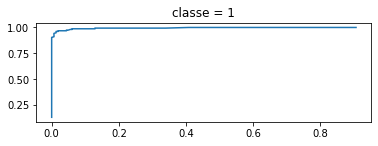

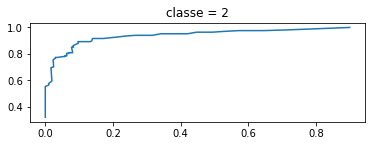

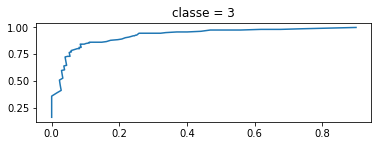

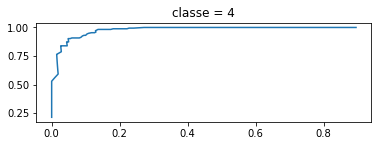

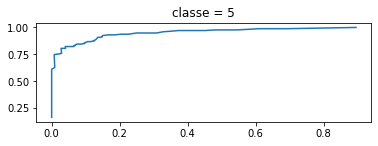

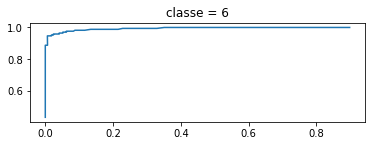

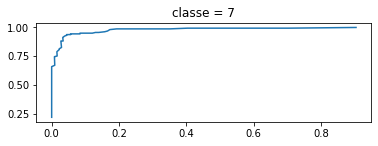

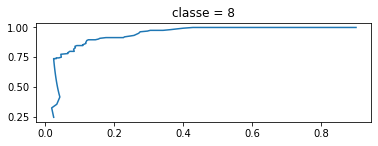

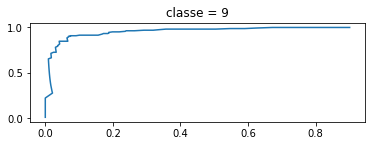

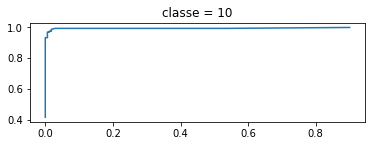

In [ ]:
Courbe_ROC_all_classes_2(Ytt,model.predict_proba(Xtt) , 100)

# Méthode 2: Arbres de décision


In [ ]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

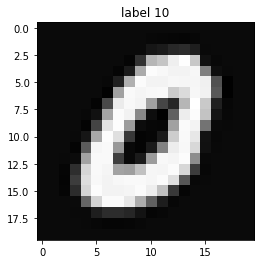

In [ ]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

Marice de confusion

In [ ]:
# from scratch
Matrice_de_confusion(Ytt, y_pred)

array([[144,   6,   2,   1,   0,   2,   1,   1,   0,   0],
       [ 11, 116,   3,   6,   6,   4,   4,  12,   4,   2],
       [  5,  14, 111,   2,  12,   1,   6,   7,   5,   4],
       [  1,   2,   2, 133,   5,   6,   5,   1,  17,   2],
       [  2,   8,  19,   3, 112,   3,   7,   5,   9,   7],
       [  2,   9,   1,   5,   5, 134,   3,   9,   1,   1],
       [  7,   6,   6,   2,   1,   0, 127,   2,   8,   2],
       [  8,   6,   5,   3,   6,   7,   0, 117,  10,   2],
       [  1,   2,   3,  16,   5,   0,   2,  10, 125,   1],
       [  0,   1,   1,   2,   5,   3,   1,   3,   6, 144]], dtype=uint64)

In [ ]:
#sklearn
confusion_matrix(Ytt, y_pred)

array([[144,   6,   2,   1,   0,   2,   1,   1,   0,   0],
       [ 11, 116,   3,   6,   6,   4,   4,  12,   4,   2],
       [  5,  14, 111,   2,  12,   1,   6,   7,   5,   4],
       [  1,   2,   2, 133,   5,   6,   5,   1,  17,   2],
       [  2,   8,  19,   3, 112,   3,   7,   5,   9,   7],
       [  2,   9,   1,   5,   5, 134,   3,   9,   1,   1],
       [  7,   6,   6,   2,   1,   0, 127,   2,   8,   2],
       [  8,   6,   5,   3,   6,   7,   0, 117,  10,   2],
       [  1,   2,   3,  16,   5,   0,   2,  10, 125,   1],
       [  0,   1,   1,   2,   5,   3,   1,   3,   6, 144]])

Rappel

In [ ]:
#from scratch
print("Rappel (from scratch) :"+str(format(Rappel(Ytt,y_pred) , ".4f")))

Rappel (from scratch) :0.7592


In [ ]:
#sklearn
print("Rappel (sklearn) :"+ str(format(recall_score(Ytt, y_pred, average='macro'), ".4f")))

Rappel (sklearn) :0.7592


Précision

In [ ]:
#from scratch
print("Précision (from scratch) :"+str(format(Precision(Ytt,y_pred) , ".4f")))

Précision (from scratch) :0.7586


In [ ]:
#sklearn
print("Précision (sklearn) :"+ str(format(precision_score(Ytt, y_pred, average='macro'), ".4f")))

Précision (sklearn) :0.7586


Taux de FP

In [ ]:
print("Taux de FP :"+ str(format(Taux_FP(Ytt,y_pred), ".4f")))

Taux de FP :0.2414


Spécificité

In [ ]:
print("Spécifité :"+ str(format(Specificite(Ytt,y_pred), ".4f")))

Spécifité :0.7586


Courbe ROC

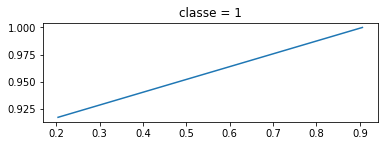

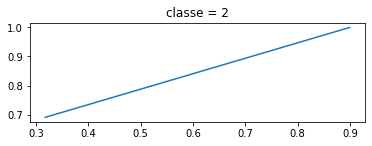

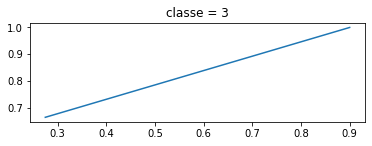

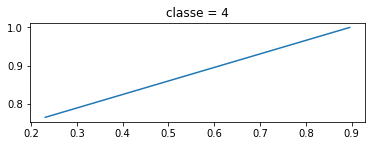

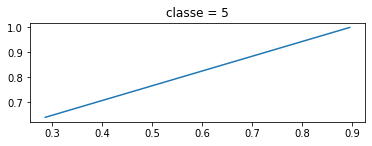

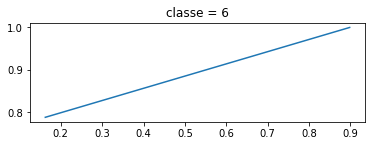

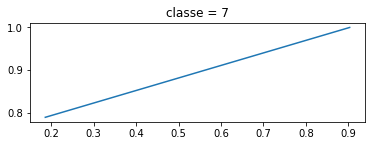

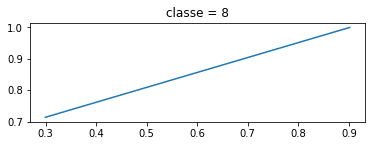

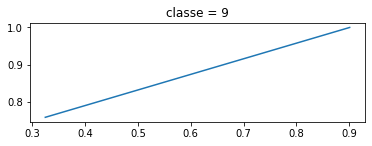

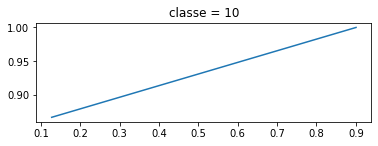

In [ ]:
Courbe_ROC_all_classes_2(Ytt,model.predict_proba(Xtt) , 100)

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [ ]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [ ]:
# Choisir un image de test 
c=2

In [ ]:
model.predict([Xtt[c,:]])

array([4])

In [ ]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

array([[0.02932353, 0.10377663, 0.10525308, 0.11464472, 0.10808623,
        0.11363418, 0.11074958, 0.10155527, 0.10892121, 0.10405558]])

Afficher l'image testée

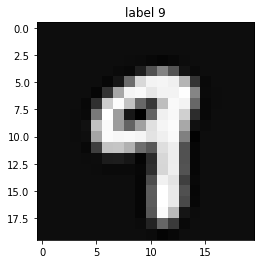

In [ ]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

In [ ]:
preds = model.predict(Xtt)

Marice de confusion

In [ ]:
# from scratch
Matrice_de_confusion(Ytt, preds)

array([[339,   0,   0,   8,   0,   0,   0,   4,   0,   0],
       [  3,   0,   0, 347,   0,   0,   0,   4,   0,   0],
       [  1,   0,   0, 353,   0,   3,   0,   1,   0,   0],
       [  5,   0,   0, 329,   0,   0,   0,   4,   0,   0],
       [  3,   0,   0, 344,   0,   0,   0,   4,   0,   0],
       [  0,   0,   0, 340,   0,   0,   0,   3,   0,   0],
       [ 13,   0,   0, 335,   0,   0,   0,   2,   0,   0],
       [  7,   0,   0, 339,   0,   0,   0,   4,   0,   0],
       [  4,   0,   0, 346,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 354,   0,   0,   0,   0,   0,   0]], dtype=uint64)

In [ ]:
#sklearn
confusion_matrix(Ytt, preds)

array([[339,   0,   0,   8,   0,   0,   0,   4,   0,   0],
       [  3,   0,   0, 347,   0,   0,   0,   4,   0,   0],
       [  1,   0,   0, 353,   0,   3,   0,   1,   0,   0],
       [  5,   0,   0, 329,   0,   0,   0,   4,   0,   0],
       [  3,   0,   0, 344,   0,   0,   0,   4,   0,   0],
       [  0,   0,   0, 340,   0,   0,   0,   3,   0,   0],
       [ 13,   0,   0, 335,   0,   0,   0,   2,   0,   0],
       [  7,   0,   0, 339,   0,   0,   0,   4,   0,   0],
       [  4,   0,   0, 346,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 354,   0,   0,   0,   0,   0,   0]])

Rappel

In [ ]:
#from scratch
print("Rappel (from scratch) :"+str(format(Rappel(Ytt,preds) , ".4f")))

Rappel (from scratch) :0.1951


In [ ]:
#sklearn
print("Rappel (sklearn) :"+ str(format(recall_score(Ytt, preds, average='macro'), ".4f")))

Rappel (sklearn) :0.1951


Précision

In [ ]:
#from scratch
print("Précision (from scratch) :"+str(format(Precision(Ytt,preds) , ".4f")))

Précision (from scratch) :0.1158


In [ ]:
#sklearn
print("Précision (sklearn) :"+ str(format(precision_score(Ytt, preds, average='macro'), ".4f")))

Précision (sklearn) :0.1158


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Taux de FP

In [ ]:
print("Taux de FP :"+ str(format(Taux_FP(Ytt,preds), ".4f")))

Taux de FP :0.2842


Spécificité

In [ ]:
print("Spécifité :"+ str(format(Specificite(Ytt,preds), ".4f")))

Spécifité :0.7158


Courbe ROC

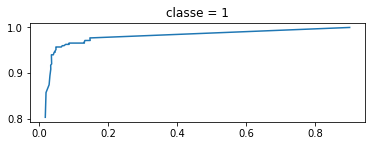

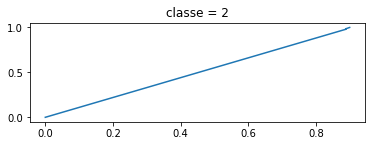

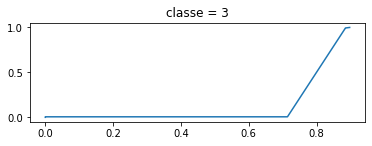

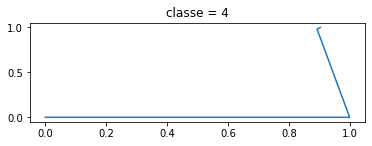

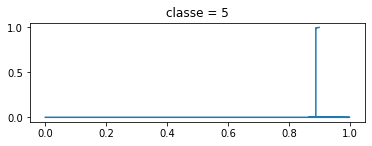

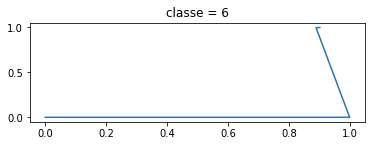

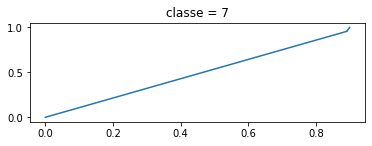

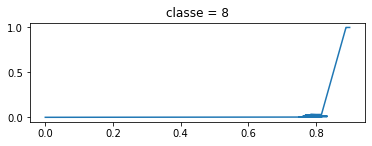

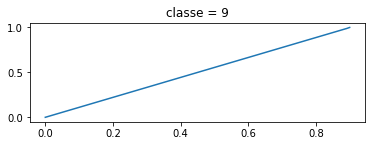

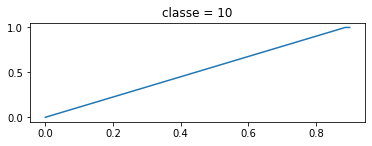

In [ ]:
Courbe_ROC_all_classes_2(Ytt,model.predict_proba(Xtt) , 100)

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [ ]:
# on remplace le label 10 par le label 0 
Ym = []
for i in range(len(Y)):
  if Y[i] == 10:
    Ym.append(0)
  else:
    Ym.append(Y[i])
Ym = np.array(Ym)

In [ ]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Ym, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [ ]:
print(Xt_rnc.shape)
print(Xtt_rnc.shape)

(1500, 20, 20, 1)
(3500, 20, 20, 1)


In [ ]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0


In [ ]:
# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Affichage des couches du CNN
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 18, 18, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2592)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               259300    
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 260,630
Trainable params: 260,630
Non-trainable params: 0
________________________________________________

In [ ]:
#fit
history = model.fit(Xt_rncN, Yt_rnc, epochs=10, validation_data=(Xtt_rncN, Ytt_rnc))

Epoch 1/10
47/47 [==============================] - 1s 20ms/step - loss: 1.1045 - accuracy: 0.6367 - val_loss: 0.4975 - val_accuracy: 0.8480
Epoch 2/10
47/47 [==============================] - 1s 16ms/step - loss: 0.4189 - accuracy: 0.8653 - val_loss: 0.3426 - val_accuracy: 0.9034
Epoch 3/10
47/47 [==============================] - 1s 17ms/step - loss: 0.2924 - accuracy: 0.9180 - val_loss: 0.2838 - val_accuracy: 0.9126
Epoch 4/10
47/47 [==============================] - 1s 17ms/step - loss: 0.2125 - accuracy: 0.9413 - val_loss: 0.2765 - val_accuracy: 0.9206
Epoch 5/10
47/47 [==============================] - 1s 22ms/step - loss: 0.1903 - accuracy: 0.9520 - val_loss: 0.3306 - val_accuracy: 0.8997
Epoch 6/10
47/47 [==============================] - 1s 22ms/step - loss: 0.1729 - accuracy: 0.9513 - val_loss: 0.2624 - val_accuracy: 0.9191
Epoch 7/10
47/47 [==============================] - 1s 22ms/step - loss: 0.1064 - accuracy: 0.9747 - val_loss: 0.2518 - val_accuracy: 0.9237
Epoch 8/10
47

In [ ]:
# evaluer le modèle
err, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=1)

110/110 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9366


Affichage des courbes d'accuracy et loss du train set aoinsi que du test set

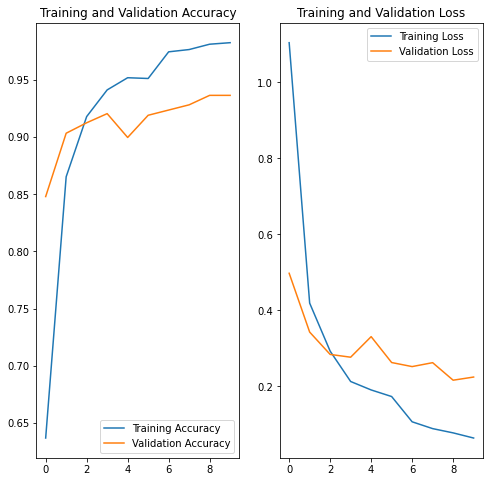

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Teste du modèle

In [ ]:
pred= model.predict(Xtt_rncN)[500]
pred

array([1.0007468e-04, 1.8831074e-07, 1.2870054e-06, 7.7471632e-06,
       1.5104623e-03, 9.5161551e-05, 5.6281934e-08, 7.7192390e-01,
       3.6785369e-07, 2.2636072e-01], dtype=float32)

7


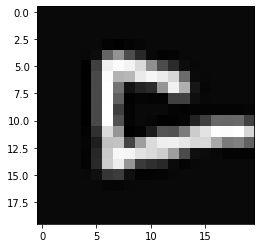

In [ ]:
plt.imshow(Xtt_rncN[500].reshape((20, 20)), cmap='gray')
print(np.where(Ytt_rnc[500])[0][0])

In [ ]:
import tensorflow as tf
score = tf.nn.softmax(pred)
print("Cette image appartient probablement à la classe \'{}\' avec une probabilité de {:.2f} %."
      .format(np.argmax(score), 100 * np.max(pred)))

Cette image appartient probablement à la classe '7' avec une probabilité de 77.19 %.


Affichage des filtres de convolution

In [ ]:
model.layers
layer_outputs = [layer.output for layer in model.layers]
feature_map_model = tf.keras.models.Model(model.input, layer_outputs)

In [ ]:
blocks = [0, 1]
outputs = [model.layers[i].output for i in blocks]

In [ ]:
input = Xtt[500].reshape(20, 20).copy()

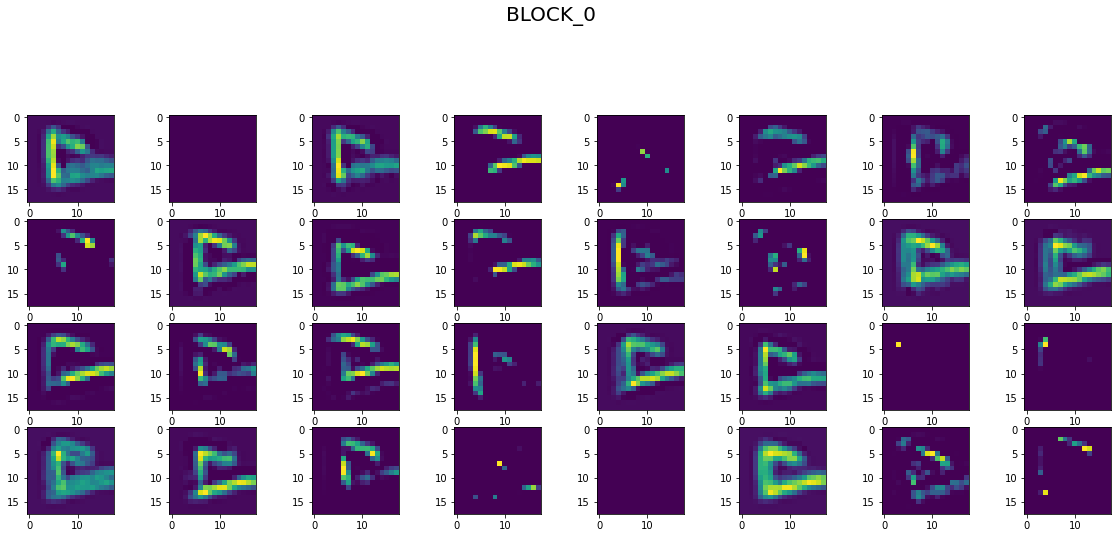

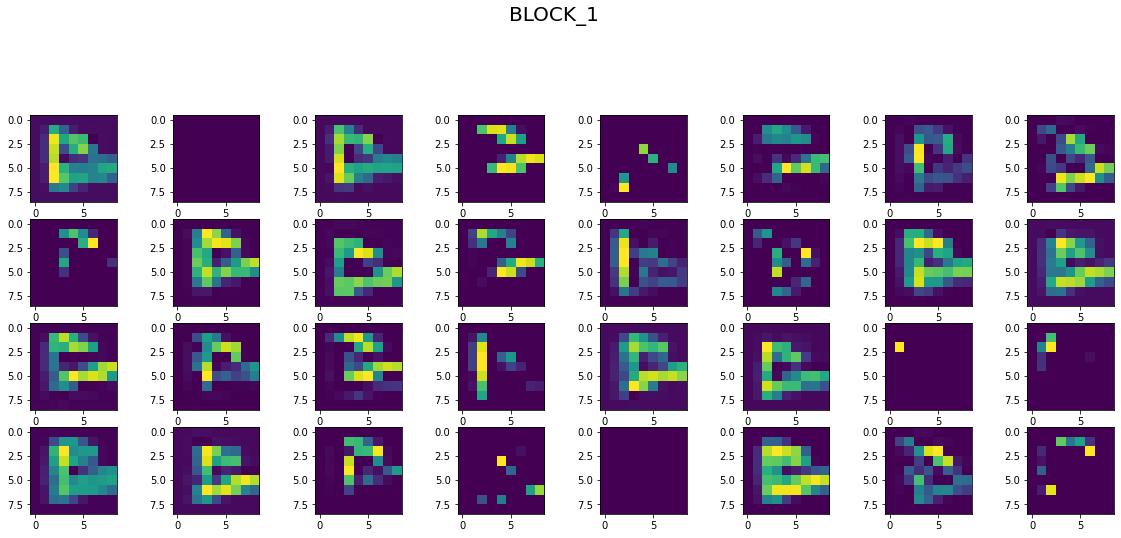

In [ ]:
input = input.reshape((1,) + input.shape)     
feature_maps = feature_map_model.predict(input)      
activation = feature_map_model(input)
a = activation[0]
a.shape  
for i,fmap in zip(blocks,feature_maps):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,a.shape[3]+1):
        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1])
    
plt.show()

# Appliquer les métriques implementées pour voir le résultat

Marice de confusion

In [ ]:
res = model.predict(Xtt_rncN)
predict = []
for i in range(len(res)):
  pred_c = np.argmax(tf.nn.softmax(res[i]))
  predict.append(pred_c)
predict = np.array(predict)
Ytt_mod = np.array(Mod_Y(Ytt_rnc))
print(predict)
print(Ytt_mod)

[0 7 9 ... 3 0 1]
[0 7 9 ... 3 0 1]


In [ ]:
# from scratch
Matrice_de_confusion_RN_RNC(Ytt_mod,predict )

array([[347,   0,   0,   0,   1,   1,   3,   2,   0,   0],
       [  0, 346,   1,   1,   2,   0,   0,   0,   1,   0],
       [  3,   2, 334,   3,   4,   0,   0,   4,   3,   1],
       [  0,   3,   4, 323,   0,  15,   1,   4,   3,   5],
       [  0,   4,   3,   0, 316,   0,   4,   1,   1,   9],
       [  2,   2,   1,   1,   4, 326,   5,   0,   2,   8],
       [  4,   1,   0,   0,   0,   4, 333,   0,   1,   0],
       [  1,   4,   5,   0,   5,   0,   0, 322,   0,  13],
       [  2,   6,   7,   3,   3,   9,   4,   0, 306,  10],
       [  5,   2,   0,   5,   2,   1,   0,  10,   1, 325]], dtype=uint64)

In [ ]:
#sklearn
confusion_matrix(Ytt_mod,predict)

array([[347,   0,   0,   0,   1,   1,   3,   2,   0,   0],
       [  0, 346,   1,   1,   2,   0,   0,   0,   1,   0],
       [  3,   2, 334,   3,   4,   0,   0,   4,   3,   1],
       [  0,   3,   4, 323,   0,  15,   1,   4,   3,   5],
       [  0,   4,   3,   0, 316,   0,   4,   1,   1,   9],
       [  2,   2,   1,   1,   4, 326,   5,   0,   2,   8],
       [  4,   1,   0,   0,   0,   4, 333,   0,   1,   0],
       [  1,   4,   5,   0,   5,   0,   0, 322,   0,  13],
       [  2,   6,   7,   3,   3,   9,   4,   0, 306,  10],
       [  5,   2,   0,   5,   2,   1,   0,  10,   1, 325]])

In [ ]:
#from scratch
print("Rappel (from scratch) :"+str(format(Rappel_RN_RNC(Ytt_mod,predict) , ".4f")))

Rappel (from scratch) :0.9366


In [ ]:
#sklearn
print("Rappel (sklearn) :"+ str(format(recall_score(Ytt_mod,predict, average='macro'), ".4f")))

Rappel (sklearn) :0.9366


In [ ]:
#from scratch
print("Précision (from scratch) :"+str(format(Precision_RN_RNC(Ytt_mod,predict) , ".4f")))

Précision (from scratch) :0.9372


In [ ]:
#sklearn
print("Précision (sklearn) :"+ str(format(precision_score(Ytt_mod,predict, average='macro'), ".4f")))

Précision (sklearn) :0.9372


Taux de FP

In [ ]:
print("Taux de FP :"+ str(format(Taux_FP_RN_RNC(Ytt_mod,predict), ".4f")))

Taux de FP :0.0628


Spécificité

In [ ]:
print("Spécifité :"+ str(format(Specificite_RN_RNC(Ytt_mod,predict), ".4f")))

Spécifité :0.9372


Courbe ROC

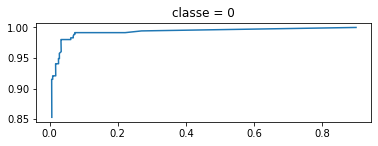

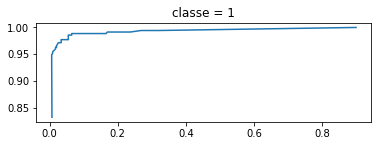

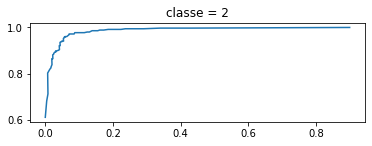

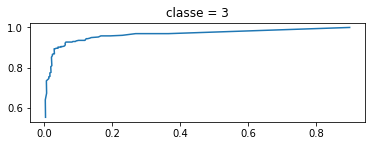

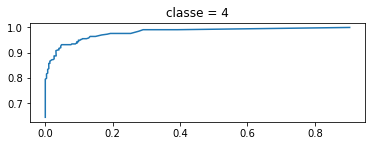

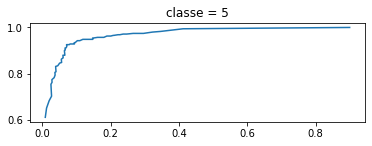

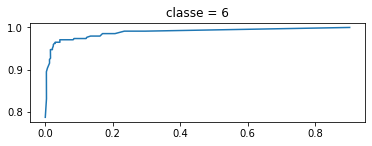

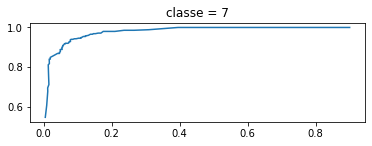

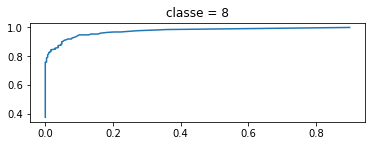

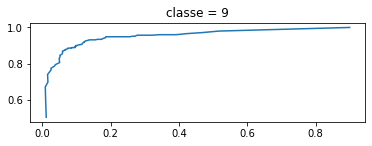

In [ ]:
Courbe_ROC_all_classes(Ytt_rnc,model.predict(Xtt_rncN) , 100)

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 4 Mars 2022 à 22h

La partie RNC peut être laissée pour le prochain TP

In [ ]:
# bonne chance